## Insights into the Android app market on Google Play

In this analysis, I have explored the different app categories, Ratings, how the size of the app and price of an app are related, how the app category and price of an app are related, the Popularity of paid apps to free apps, and analyzed the sentiment analysis of user reviews of android apps on Google Play Store.

Let's take a look at the data, which consists of two files:

`Apps.csv`: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
    
`User_Reviews.csv`: contains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

### 1. Reading the Data

In [27]:
import pandas as pd
data = pd.read_csv('datasets/Apps.csv')
data = data.drop(['Unnamed: 0'],axis=1)

# Drop duplicates from apps_with_duplicates
apps = data.drop_duplicates()

# Printing the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Printing thr summary of apps dataframe
print(apps.info())

# Printing top 5 rows
display(apps.head(5))

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB
None


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Cleaning the Data

Here columns I used mostly are Installs, Size, Rating, and Price. As shown in the dataset summary above Installs and Price columns are of type object and not int or float, This is because these columns are having `+`, `,` and `$`  characters in their values. 

Hence they need to be cleaned to numerical data for analysis.

In [28]:
# Listing characters to remove
chars_to_remove = ["+",",",'$']


# Listing column names to clean
cols_to_clean = ['Installs','Price']

# Looping through each column in cols_to_clean
for col in cols_to_clean:
    # Looping through each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char,""))
    # Converting col to float data type
    apps[col] = apps[col].astype(float) 
    
apps[['Installs','Price']]

,Installs,Price
0,10000.0,0.0
1,500000.0,0.0
2,5000000.0,0.0
3,50000000.0,0.0
4,100000.0,0.0
...,...,...
9654,5000.0,0.0
9655,100.0,0.0
9656,1000.0,0.0
9657,1000.0,0.0


### 3. Exploring app categories

Here I have analyzed the following questions:
1. Which category has the highest share of (active) apps in the market?
2. Is any specific category dominating the market?
3. Which categories have the fewest number of apps?

I have used and refered https://plotly.com/python/ to visualize data.

In [29]:
# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)


import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Count the number of apps in each 'Category'. Sort in descending order depending on number of apps in each category
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


## 4. Checking Average of App Ratings
App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

In [30]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'])]



# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'},
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## 5. How the size of the app and price of an app are related.

Here I have analyzed the following questions:
1. Does the size of an app affect its rating?
2. Do users really care about system-heavy apps or do they prefer light-weighted apps?
3. Does the price of an app affect its rating?
4. Do users always prefer free apps over paid apps?

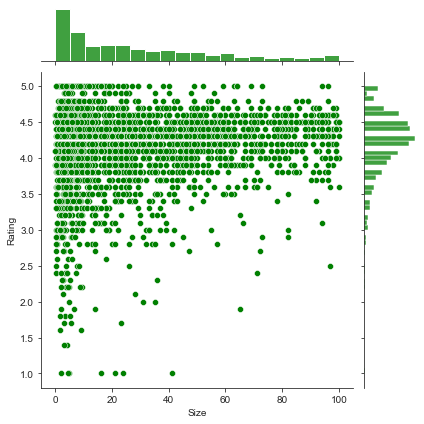

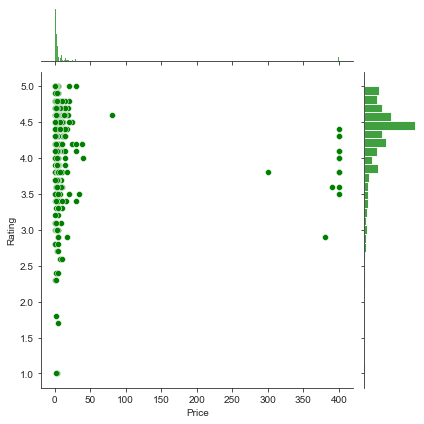

In [31]:
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
import warnings
warnings.filterwarnings("ignore")

# Selecting rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(apps['Rating'].notnull()) & (apps['Size'].notnull())]
# You can also use above line as shown below
# apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]


# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 300)

# Ploting size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'],color='g')

# Selecting apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Ploting price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'],color='g')

## 6. How the app category and price of an app are related.

Here I have analyzed the following questions:
1. How are companies and developers supposed to make ends meet? 
2. What monetization strategies can companies use to maximize profit?

I think the costs of apps are largely based on features, complexity, and platform.

In [32]:
import matplotlib.pyplot as plt
import plotly.express as px

# Selecting a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examining the price trend by plotting Price vs Category
fig = px.strip(popular_app_cats, x = 'Price', y = 'Category', 
               title="App Pricing Trend across Categories", template = 'plotly_dark')
fig.show()


# Apps whose Price is greater than 200 are
apps_above_200 = popular_app_cats[popular_app_cats['Price'].values > 200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


## 7. Filtering Junk Apps
Their are apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. 
Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

In [33]:
# Selecting apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'].values < 100]


# Examining price vs category with the authentic apps (apps_under_100)
fig = px.strip(apps_under_100, x = 'Price', y = 'Category', 
               title="App pricing trend across categories after filtering for junk apps", template = 'plotly_dark')
fig.show()

## 8. Popularity of paid apps to free apps

Here I have analyzed the following question:
* Are paid apps installed as much as free apps?

Some characteristics of free apps are:

* Free to download.
* Main source of income often comes from advertisements.
* Often created by companies that have other products and the app serves as an extension of those products.
* Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:

* Users are asked to pay once for the app to download and use it.
* The user can't really get a feel for the app before buying it.

In [34]:
# Data for paid apps
box0 = go.Box(
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

# Data for free apps
box1 = go.Box(
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)


layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)


# Adding box0 and box1 to a list for plotting
data = [box0, box1]
layout.template = 'plotly_dark'
plotly.offline.iplot({'data': data, 'layout': layout})

## 9. Analyzing the sentiment analysis of user reviews on android apps on Google Play Store.

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called `Sentiment Analysis`. 

User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

In [35]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/User_Reviews.csv')
display(reviews_df.info())

# Join the two dataframes
merged_df = apps.merge(reviews_df)

merged_df.info()
# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

fig = px.box(merged_df, x="Type", y="Sentiment_Polarity",title="Sentiment Polarity Distribution", template = 'plotly_dark')
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Review                  37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61556 entries, 0 to 61555
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     61556 non-null  object 
 1   Category                61556 non-null  object 
 2   Rating                  61556 non-null  float64
 3   Reviews                 61556 non-null  int64  
 4   Size                    41150 non-null  float64
 5   Installs                61556 non-null  float64
 6   Type                    61556 non-null  object 
 7   Price                   61556 non-null  float64
 8   Content Rating          61556 non-null  object 
 9   Genres                  61556 non-null  object 
 10  Last Updated            61556 non-null  object 
 11  Current Ver             61556 non-null  object 
 12  Android Ver             61556 non-null  object 
 13  Review                  35929 non-null  object 
 14  Sentiment               35934 non-null

<pre>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average.<pre>

Insights into the Android app market on Google Play

In this project, I have Loaded, cleaned, and visualized Google Play Store data to gain insights into the Android app market.